In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer

# from random import gauss
# from mpl_toolkits.mplot3d import Axes3D

from statsmodels.formula.api import ols
import statsmodels.api as sm

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Shows *all* columns in dataframe, i.e. does not truncate horizontally
pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv('./data/kc_house_data.csv')

# Listing out column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# Converting column `date` to datetime64[ns] from type string/object
df['date'] = df['date'].astype('datetime64[ns]')

In [5]:
df_copy = df.copy()

In [6]:
df_copy['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [7]:
df_copy = df_copy.sort_values(by=['id', 'date'])
df_copy = df_copy.drop_duplicates(subset=['id'], keep='last')

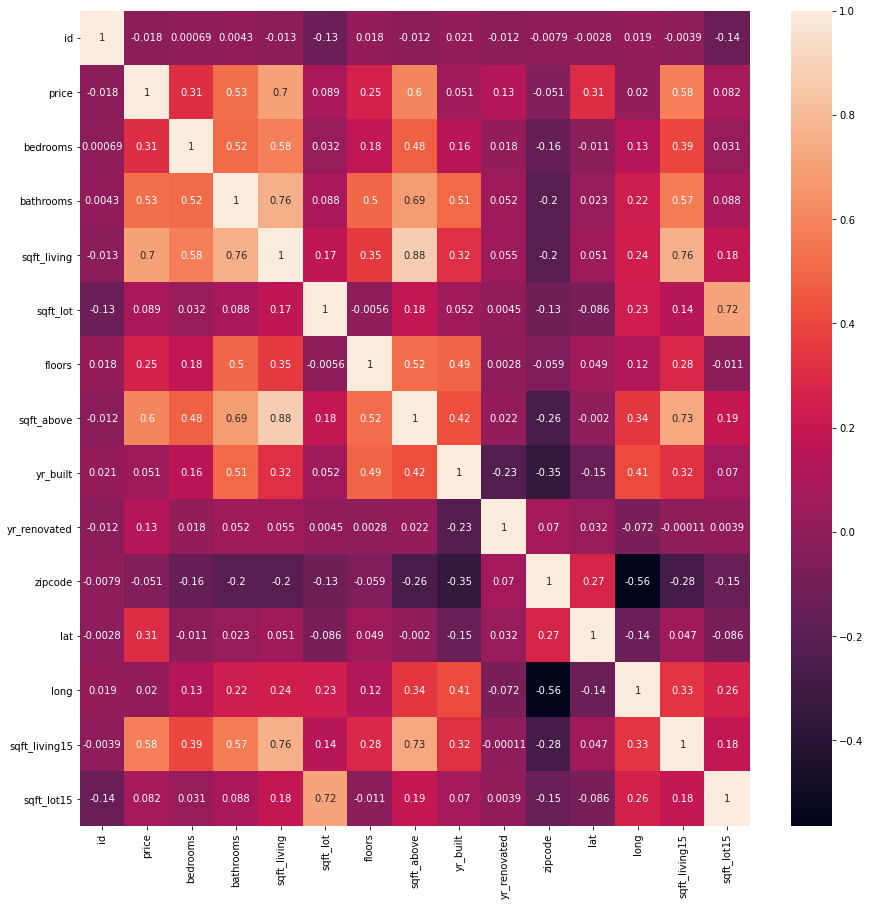

In [8]:
#looking at correlations
fig, ax = plt.subplots(figsize=(15,15))
heat = sns.heatmap(df_copy.corr(), annot = True)

In [9]:
df_copy.groupby('view').mean()

df_copy.sort_values('price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014-10-13,7700000.00,6,8.00,12050,27600,2.50,NO,GOOD,Good,13 Mansion,8570,3480.0,1910,1987.00,98102,47.63,-122.32,3940,8800
3910,9808700762,2014-06-11,7060000.00,5,4.50,10040,37325,2.00,YES,AVERAGE,Average,11 Excellent,7680,2360.0,1940,2001.00,98004,47.65,-122.21,3930,25449
9245,9208900037,2014-09-19,6890000.00,6,7.75,9890,31374,2.00,NO,EXCELLENT,Average,13 Mansion,8860,1030.0,2001,0.00,98039,47.63,-122.24,4540,42730
4407,2470100110,2014-08-04,5570000.00,5,5.75,9200,35069,2.00,NO,NONE,Average,13 Mansion,6200,3000.0,2001,nan,98039,47.63,-122.23,3560,24345
1446,8907500070,2015-04-13,5350000.00,5,5.00,8000,23985,2.00,NO,EXCELLENT,Average,12 Luxury,6720,1280.0,2009,0.00,98004,47.62,-122.22,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18453,7999600180,2014-05-29,83000.00,2,1.00,900,8580,1.00,NO,NONE,Average,5 Fair,900,0.0,1918,0.00,98168,47.47,-122.27,2060,6533
2139,1623049041,2014-05-08,82500.00,2,1.00,520,22334,1.00,NO,NONE,Fair,5 Fair,520,0.0,1951,0.00,98168,47.48,-122.30,1572,10570
16184,3028200080,2015-03-24,81000.00,2,1.00,730,9975,1.00,NaN,NONE,Poor,5 Fair,730,0.0,1943,0.00,98168,47.48,-122.31,860,9000
465,8658300340,2014-05-23,80000.00,1,0.75,430,5050,1.00,NaN,NONE,Fair,4 Low,430,0.0,1912,0.00,98014,47.65,-121.91,1200,7500


In [10]:
# Dropping irrelevant columns
df_copy.drop(columns = ['id', 'floors', 'waterfront', 'date',
                        'lat', 'long', 'condition', 'yr_renovated',
                         'sqft_lot15','sqft_above', 'sqft_living15',
                         'sqft_basement'],
                        inplace=True)

In [11]:
df_copy.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,yr_built,zipcode
2495,300000.00,6,3.00,2400,9373,NONE,7 Average,1991,98002
6729,647500.00,4,1.75,2060,26036,NONE,8 Good,1947,98166
8404,400000.00,3,1.00,1460,43000,NONE,7 Average,1952,98166
8800,235000.00,3,1.00,1430,7599,NONE,6 Low Average,1930,98168
3553,402500.00,4,2.00,1650,3504,NONE,7 Average,1951,98144


In [12]:
#previous run showed a fan like residual shape and that there's a pattern so we are transform
df_copy['sqft_living'] = np.log(df_copy['sqft_living'])

In [13]:
# Establishing target and predictor variables
df_copy = df_copy[df_copy['grade'] != '3 Poor']

In [14]:
df_copy

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,yr_built,zipcode
2495,300000.00,6,3.00,7.78,9373,NONE,7 Average,1991,98002
6729,647500.00,4,1.75,7.63,26036,NONE,8 Good,1947,98166
8404,400000.00,3,1.00,7.29,43000,NONE,7 Average,1952,98166
8800,235000.00,3,1.00,7.27,7599,NONE,6 Low Average,1930,98168
3553,402500.00,4,2.00,7.41,3504,NONE,7 Average,1951,98144
...,...,...,...,...,...,...,...,...,...
16723,365000.00,5,2.00,7.38,4168,NONE,7 Average,1927,98126
3257,380000.00,2,1.00,6.95,7372,NONE,7 Average,1939,98126
7614,339000.00,3,1.00,7.00,4128,NONE,7 Average,1942,98126
20963,399900.00,2,1.75,7.25,1005,NONE,9 Better,2011,98027


In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 2495 to 15937
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21419 non-null  float64
 1   bedrooms     21419 non-null  int64  
 2   bathrooms    21419 non-null  float64
 3   sqft_living  21419 non-null  float64
 4   sqft_lot     21419 non-null  int64  
 5   view         21356 non-null  object 
 6   grade        21419 non-null  object 
 7   yr_built     21419 non-null  int64  
 8   zipcode      21419 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


In [16]:
df_copy.bedrooms = df_copy.bedrooms.astype(str)

In [17]:
df_copy.bathrooms  = df_copy.bathrooms.astype(str)

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 2495 to 15937
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21419 non-null  float64
 1   bedrooms     21419 non-null  object 
 2   bathrooms    21419 non-null  object 
 3   sqft_living  21419 non-null  float64
 4   sqft_lot     21419 non-null  int64  
 5   view         21356 non-null  object 
 6   grade        21419 non-null  object 
 7   yr_built     21419 non-null  int64  
 8   zipcode      21419 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 1.6+ MB


In [19]:
X = df_copy.drop(columns = 'price')

In [20]:
y = df_copy.price

In [21]:
# Creating variables for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
train_df = pd.concat([X_train, y_train], axis=1)

test_df = pd.concat([X_test, y_test], axis=1)

In [23]:
# Did it split correctly?
len(X_train + X_test) == len(X)

True

In [24]:
simple_model = sm.OLS(y_train, sm.add_constant(X_train['sqft_living'])).fit()

In [25]:
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     8365.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:55:15   Log-Likelihood:            -2.0093e+05
No. Observations:               14350   AIC:                         4.019e+05
Df Residuals:                   14348   BIC:                         4.019e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.426e+06   4.34e+04    -78.854      0.000   -3.51e+06   -3.34e+06
sqft_living  5.254e+05   5744.837     91.458      0.000    5.14e+05    5.37e+05
==============================================================================
Omnibus:                    13227.742   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1260597.499
Skew:                           4.113   Prob(JB):                         0.00
Kurtosis:                      48.174   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Get our predictions!
simple_train_preds = simple_model.predict(sm.add_constant(X_train['sqft_living']))
simple_train_preds

14622   497226.33
1744    717221.00
2729    494215.38
13117   725063.09
18281   372424.45
           ...   
13105   654348.05
17476   336990.11
9990    807720.75
338     387437.19
9180      8237.87
Length: 14350, dtype: float64

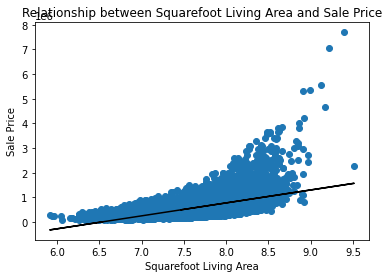

In [27]:
# Just looking at two variables

# Plot our points, rating vs balance, as a scatterplot
plt.scatter(train_df['sqft_living'], train_df['price'])

# Plot the line of best fit!
plt.plot(train_df['sqft_living'], simple_train_preds, color='black')

plt.ylabel('Sale Price')
plt.xlabel('Squarefoot Living Area')
plt.title('Relationship between Squarefoot Living Area and Sale Price')
plt.show()

In [28]:
summary_of_view = df_copy.groupby('view').agg(['mean', 'std'])

summary_of_view

price           sqft_living      sqft_lot           yr_built  \
                mean       std        mean  std     mean       std     mean   
view                                                                          
AVERAGE    791956.68 510351.93        7.79 0.43 22331.72  60261.29  1964.82   
EXCELLENT 1454416.19 934214.96        8.02 0.44 21762.46  35989.90  1965.77   
FAIR       814386.56 513226.70        7.77 0.42 12342.66  17078.17  1962.90   
GOOD       972849.27 615076.79        7.94 0.39 35010.67 109236.86  1967.34   
NONE       498348.59 287343.67        7.52 0.41 14178.52  37110.06  1971.74   

                 zipcode        
            std     mean   std  
view                            
AVERAGE   29.70 98090.98 59.82  
EXCELLENT 27.23 98096.41 61.65  
FAIR      26.36 98096.60 61.08  
GOOD      30.00 98092.44 62.24  
NONE      29.37 98076.21 52.33

In [29]:
# Figure out how to do this in a loop/function?
df_average = train_df[train_df['view'] == 'AVERAGE']
df_excellent = train_df[train_df['view'] == 'EXCELLENT']
df_fair = train_df[train_df['view'] == 'FAIR']
df_good = train_df[train_df['view'] == 'GOOD']
df_none = train_df[train_df['view'] == 'NONE']

In [30]:
train_df['view'].value_counts()

NONE         12913
AVERAGE        637
GOOD           336
FAIR           230
EXCELLENT      192
Name: view, dtype: int64

In [31]:
fvalue, pvalue = stats.f_oneway(df_average['price'], df_excellent['price'], df_fair['price'],
                                df_good['price'] , df_none['price'])

In [32]:
train_df.grade.value_counts()

7 Average        5975
8 Good           4030
9 Better         1744
6 Low Average    1349
10 Very Good      754
11 Excellent      261
5 Fair            147
12 Luxury          64
4 Low              19
13 Mansion          7
Name: grade, dtype: int64

In [33]:
# Dropping poor row, since there is only one
df3 = train_df.copy()

In [34]:
df3.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,yr_built,zipcode,price
14622,4,2.5,7.47,8476,NONE,7 Average,1983,98058,335000.00
1744,4,2.5,7.89,5608,NONE,9 Better,2003,98029,729000.00
2729,3,1.0,7.46,5247,NONE,7 Average,1947,98168,283000.00
13117,4,2.5,7.90,5100,NONE,8 Good,1968,98136,550000.00
18281,3,1.75,7.23,8182,NONE,7 Average,1942,98133,425000.00


In [35]:
df3.grade = [x.replace(" ", "_").strip() for x in df3.grade]

In [36]:
df3['grade'].value_counts()

7_Average        5975
8_Good           4030
9_Better         1744
6_Low_Average    1349
10_Very_Good      754
11_Excellent      261
5_Fair            147
12_Luxury          64
4_Low              19
13_Mansion          7
Name: grade, dtype: int64

In [37]:
# Might need a for loop or a function here
df_10 = train_df[train_df['grade'] == '10 Very Good']
df_11 = train_df[train_df['grade'] == '11 Excellent']
df_12 = train_df[train_df['grade'] == '12 Luxury']
df_4 = train_df[train_df['grade'] == '4 Low']
df_5 = train_df[train_df['grade'] == '5 Fair']
df_6 = train_df[train_df['grade'] == '6 Low Average']
df_7 = train_df[train_df['grade'] == '7 Average']
df_8 = train_df[train_df['grade'] == '8 Good']
df_9 = train_df[train_df['grade'] == '9 Better']

In [38]:
# Finding f-statistic and p-value using ANOVA testing

f_value_grade, p_value_grade = stats.f_oneway(df_10['price'], df_11['price'], df_12['price'],
                                              df_4['price'], df_5['price'], df_6['price'],
                                              df_7['price'], df_8['price'], df_9['price'])
p_value_grade

0.0

In [39]:
# Ad-hoc test to determine differeces in price vs. grade

df_grade = train_df[['grade', 'price']]

print(pairwise_tukeyhsd(df_grade['price'], df_grade['grade']))

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
    group1        group2       meandiff   p-adj      lower         upper     reject
-----------------------------------------------------------------------------------
 10 Very Good  11 Excellent   381056.6583  0.001   322630.8353   439482.4812   True
 10 Very Good     12 Luxury  1074763.4844  0.001   968843.2982  1180683.6706   True
 10 Very Good    13 Mansion  2930578.2166  0.001  2621665.7899  3239490.6432   True
 10 Very Good         4 Low  -879246.2195  0.001 -1068221.5081   -690270.931   True
 10 Very Good        5 Fair   -826698.729  0.001  -900047.9995  -753349.4585   True
 10 Very Good 6 Low Average  -769929.2032  0.001   -806921.026  -732937.3804   True
 10 Very Good     7 Average  -672494.5974  0.001  -703935.7443  -641053.4505   True
 10 Very Good        8 Good  -533427.0034  0.001  -565707.1228  -501146.8839   True
 10 Very Good      9 Better  -300298.5162  0.001  -335756.5824  -264840.4499

In [40]:
df3.view.value_counts()

NONE         12913
AVERAGE        637
GOOD           336
FAIR           230
EXCELLENT      192
Name: view, dtype: int64

In [41]:
df_copy.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view',
       'grade', 'yr_built', 'zipcode'],
      dtype='object')

In [42]:
len(df_copy.zipcode.unique())

70

Dropping the view_Fair because it's not different in term of mean price compared to average, dropping low in grade because it's not significant to some other grades but significant to others.

In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14350 entries, 14622 to 9180
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     14350 non-null  object 
 1   bathrooms    14350 non-null  object 
 2   sqft_living  14350 non-null  float64
 3   sqft_lot     14350 non-null  int64  
 4   view         14308 non-null  object 
 5   grade        14350 non-null  object 
 6   yr_built     14350 non-null  int64  
 7   zipcode      14350 non-null  int64  
 8   price        14350 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 1.1+ MB


In [44]:
len(df3.zipcode.unique())

70

In [45]:
cat_cols = [c for c in df3.columns if df3[c].dtype == 'O']

encoder = OneHotEncoder(drop='if_binary')

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.

ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough')
ct.fit(df3)
X_train_enc = ct.transform(df3)
X_train_enc

<14350x60 sparse matrix of type '<class 'numpy.float64'>'
	with 129150 stored elements in Compressed Sparse Row format>

In [46]:
X_train_enc= pd.DataFrame(X_train_enc, columns= ct.get_feature_names())

C:\Users\xiaoh\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ValueError: Shape of passed values is (14350, 1), indices imply (14350, 60)

In [ ]:
# Instantiate our scaler

scaler = StandardScaler()

# Fit our scaler 

scaler.fit(X_train_enc)

# Transform training data

X_train_scaled = scaler.transform(X_train_enc)
X_train_scaled

In [ ]:
y_train.shape

In [ ]:
scaled_p_df = pd.DataFrame(X_train_scaled, columns= ct.get_feature_names_out(), index = y_train.index)

In [ ]:
scaled_p_df.head()

In [ ]:
scaled_p_df.columns = [x.replace("ohe__", "").replace('remainder__','').strip() for x in scaled_p_df.columns]

In [ ]:
scaled_p_df.head()

In [ ]:
scaled_p_df.drop(columns = ['view_FAIR', 'grade_4_Low'], inplace = True)

In [ ]:
fig, ax = plt.subplots()

x = scaled_p_df['sqft_living']
y = scaled_p_df['price']


ax.scatter(x, y);

In [ ]:
np.corrcoef(df['sqft_living'],df['price'])

In [ ]:
# Baseline model
# Import necessary package
from sklearn.dummy import DummyRegressor

# Instantiate
dummy_lr = DummyRegressor()

# Create variables
X = scaled_p_df['sqft_living']
y = scaled_p_df['price']

# Fit
dummy_lr.fit(X,y)

# Score
dummy_lr.score(X,y)

In [ ]:
#Define X and y variable using scaled & parse dataframe

X_s_p = scaled_p_df[['sqft_living']]
y_s_p = scaled_p_df[['price']]

In [ ]:
sk_lr = LinearRegression()
sk_lr.fit(X_s_p, y_s_p)
preds = sk_lr.predict(y_s_p)

preds

In [ ]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]

In [ ]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]


In [ ]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]
resids = y - preds
resids

In [ ]:
#Create out bins

bins = int( len(X)**.5)
bins

In [ ]:
# Histogram of residuals

plt.hist(resids, bins=bins);

In [ ]:
print(resids.max())
resids.min()

In [ ]:
sns.displot(resids, bins=bins, kde=True)

In [ ]:
sm.qqplot(resids, line='r');

In [ ]:
# resid plot sns.resid

sns.residplot(x=X, y=y);

In [ ]:
plt.scatter(preds, resids);

In [ ]:
#Fit the dummy_regressor

dummy_lr.fit(X_s_p,y_s_p)

In [ ]:
# Score it

dummy_lr.score(X_s_p,y_s_p)

# Modeling

In [ ]:
# Creating a straightforward, initial model --
# just for kicks
simple_formula = 'price ~ sqft_living'
simple_models = ols(formula = simple_formula,
                   data = scaled_p_df).fit()
simple_mod_summ = simple_models.summary()

simple_mod_summ

In [ ]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

x1 = scaled_p_df[['sqft_living']]
y1 = scaled_p_df[['price']]

# x2 = scaled_and_parse_df[['bedrooms']]

ax[0].scatter(x1, y1)
# ax[1].scatter(x2,y1);

In [ ]:
simple_formula4 = 'price ~ sqft_living + view_GOOD + view_NONE + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

In [ ]:
simple_formula4 = 'price ~  view_GOOD + view_NONE + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

In [ ]:
simple_formula4 = 'price ~ sqft_living + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

In [ ]:
simple_formula4 = 'price ~ sqft_living + view_GOOD + view_NONE'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

In [ ]:
no_y_train_df = scaled_p_df.drop(columns = 'price')

In [ ]:
#just bedroom, bathrooms, sqft_lot, no zipcode
no_zip_yr_built = no_y_train_df.drop(columns = ['zipcode', 'yr_built'])

In [ ]:
all_var = sm.OLS(y_train, sm.add_constant(no_zip_yr_built)).fit()
all_var.summary()

In [ ]:
no_zip_yr_built_bathrooms = no_y_train_df.drop(columns = ['zipcode', 'yr_built', 'bathrooms'])

In [ ]:
all_var = sm.OLS(y_train, sm.add_constant(no_zip_yr_built_bathrooms)).fit()
all_var.summary()

In [ ]:
no_zip_yr_built_bathrooms_bedrooms = no_y_train_df.drop(columns = ['zipcode', 'yr_built', 'bathrooms', 'bedrooms'])

In [ ]:
all_var = sm.OLS(y_train, sm.add_constant(no_zip_yr_built_bathrooms_bedrooms)).fit()
all_var.summary()

In [ ]:
no_zip_built_bathrooms_bedrooms_lot = no_y_train_df.drop(columns = ['zipcode', 'yr_built', 'bathrooms', 'bedrooms', 'sqft_lot'])

In [ ]:
all_var = sm.OLS(y_train, sm.add_constant(no_zip_built_bathrooms_bedrooms_lot)).fit()
all_var.summary()

No log transformation
- sqft_living = .488
- sqft_living+ view + grade = .593
- view + grade = .535
- sqft_living + grade = .570
- living + view = .517
- view + grade + bedroom + bathroom + living + lot = .614
- view + grade + living + bedrooms + lot = .614
- view + grade + living + lot = .613
- view + grade + living = .612


Post log transformation
- sqft_living = .368
- sqft_living+ view + grade = .571
- view + grade = .535
- sqft_living + grade = .544
- living + view = .414
- view + grade + bedroom + bathroom + living + lot = .592 (bedroom & bathroom are multicollinear)
- view + grade + living + bedrooms + lot = .592 (we get the same adj r-sqr because bedroom & bathroom are multicollinear)
- view + grade + living + lot = .592
- view + grade + living = .591

## Testing Data

In [ ]:
# Can now predict for our test set!
simple_test_preds = simple_model.predict(sm.add_constant(X_test['sqft_living']))
simple_test_preds

In [ ]:
r2_score(y_test,simple_test_preds)

In [ ]:
r2_score(y_train,simple_train_preds)

Our simple model appears to under perform our test model by .02.

In [ ]:
# One last thing - can visualize both train and test set!

# Plot our training data
plt.scatter(train_df['sqft_living'], train_df['price'], color='blue', label='Training')
# Plot our testing data
plt.scatter(test_df['sqft_living'], test_df['price'], color='green', label='Testing')


# Plot the line of best fit
plt.plot(train_df['sqft_living'], simple_train_preds, color='black')
# Plotting for the test data just to show it's the same!
plt.plot(test_df['sqft_living'], simple_test_preds, color='red')

plt.ylabel('Sale Price')
plt.xlabel('Square Foot Living Area')
plt.title('Relationship between Sale Price and Square Foot Living Area')
plt.legend()
plt.show()

In [ ]:
test_df.grade = [x.replace(" ", "_").strip() for x in test_df.grade]

In [ ]:
X_test_enc = ct.transform(test_df)
X_test_enc

In [ ]:
X_test_enc= pd.DataFrame(X_test_enc, columns= ct.get_feature_names())

In [ ]:
# Transform training data
X_test_scaled = scaler.transform(X_test_enc)
X_test_scaled

In [ ]:
scaled_test_df = pd.DataFrame(X_test_scaled, columns= ct.get_feature_names_out(), index = y_test.index)

In [ ]:
scaled_test_df.columns = [x.replace("ohe__", "").replace('remainder__','').strip() for x in scaled_test_df.columns]

In [ ]:
scaled_test_df.drop(columns = ['view_FAIR', 'grade_4_Low'], inplace = True)

In [ ]:
X_train_scaled

In [ ]:
scaled_test_df.head()

In [ ]:
test_model =scaled_test_df.drop(columns = ['price', 'bedrooms', 'zipcode', 'bathrooms', 'yr_built'])

In [ ]:
test_model.shape

In [ ]:
no_zip_yr_built_bathrooms_bedrooms.shape

In [ ]:
# Set up and fit your model
model = LinearRegression()

model.fit(no_zip_yr_built_bathrooms_bedrooms, y_train)

In [ ]:
model.score(no_zip_yr_built_bathrooms_bedrooms, y_train)

In [ ]:
model.score(test_model, y_test)

In [ ]:
train_preds = model.predict(no_zip_yr_built_bathrooms_bedrooms)

test_preds = model.predict(test_model)

In [ ]:
r2_score(y_train, train_preds)

In [ ]:
r2_score(y_test, test_preds)

Our model explained the test variance better than our train by about 3%.